In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import time
np.set_printoptions(threshold=np.inf)  #使输出数据完整显示

src_dir='/home/zhaobenyan/repos/patchV1/src/'
patchfast='/home/zhaobenyan/dataset/patchfast/'

In [2]:
#将minimal.cfg中的替死鬼文件中的数据换成实验输入的，dir:grating所在地址 
def replace(dir):
    with open(dir) as f:
        x_1 = np.fromfile(f, 'i4', 1)
        x_2 = np.fromfile(f, 'i4', 3)
        nFrame=x_2[0]
        size=x_2[1]
        x_3 = np.fromfile(f, 'f4', 3)
        x_4 = np.fromfile(f, 'f4', 2)
        x_5 = np.fromfile(f, 'u4', 1)
        x_6 = np.fromfile(f, 'f4', nFrame*size*size*3)
        #写文件,'wb'表示覆盖写文件 f1打开“替死鬼”文件地址
        f1 = open('/home/zhaobenyan/dataset/resource/static_color-grid_16.bin', 'wb') 
        np.array(x_1).astype('i4').tofile(f1) 
        np.array((x_2[0],size,size), dtype='i4').tofile(f1)
        x_3.astype('f4').tofile(f1) # init_luminance
        np.array(x_4, dtype='f4').tofile(f1)
        np.array(x_5).astype('u4').tofile(f1)
        np.array(x_6).astype('f4').tofile(f1)
        f1.close() #记得要关文件

In [9]:
#运行minimalTC
def minimalTC():
   os.system(f'cd {src_dir} && ./minimalTC')
def patch():
   os.system(f'cd {patchfast} && patch_fast -c {src_dir}minimal.cfg') 

In [4]:
#读取fr
def read_spike(file):
    with open(file) as f:
        sampleSize = np.fromfile(f, 'u4', 1)[0] #一共5120
        sample_t0, sample_t1 = np.fromfile(f, 'f4', 2)#t0是开始时间，t1是结束时间，我一共跑了1s
        nt = np.fromfile(f, 'u4', 1)[0]
        nLGN = np.fromfile(f, 'u4', 1)[0]
        LGN_spike_time = np.fromfile(f, 'u4', nLGN*nt)
        sampleID = np.fromfile(f, 'u4', sampleSize)#id排序是顺序的
        sample_spikeCount = np.fromfile(f, 'u4', sampleSize)
        fr = sample_spikeCount/(sample_t1-sample_t0)*1000
    LGN_spike_time = LGN_spike_time.reshape((nt,nLGN)).T
    return LGN_spike_time,fr


In [12]:
#实验测试 file:输入图片
def experiment(file):
    replace(file)
    #minimalTC()
    patch()

In [6]:
#读取grating的数据  file:文件路径 static_color-grid_{}_cfg.bin类型的文件
def read_grating_cfg(file):
    with open(file) as f: #可以去查查with是干嘛的，它是以防你忘记关掉文件，这种表达会比较好
        sf = np.fromfile(f,'f4',1)[0] #为啥是np.fromfile（。。。）[0],因为用np命令的读出来是array，其实我们只是要他的元素
        ori = np.fromfile(f,'f4',1)[0] 
        phase = np.fromfile(f,'f4',1)[0]
        contrast = np.fromfile(f,'f4',1)[0] #一般读取到contrast就停了
        #crest = np.fromfile(f,'f4',3)  #波峰
        #valley = np.fromfile(f,'f4',3) #波谷
    return sf, ori, phase, contrast

In [14]:
os.system(f'cd {src_dir}/ && ./compile-nonhpc')
os.system(f'cd {src_dir}/ && ./gompile-nonhpc')
os.system(f'cd {src_dir}/ && ./rompile-nonhpc')

patch.cu(4407): warning: variable "get_excRangeBound" was declared but never referenced

patch.cu(1342): warning: variable "simpleContrast" was declared but never referenced

ptxas info    : 221856 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z17cudaMemsetNonzeroIfEvPT_jS0_' for 'sm_75'
ptxas info    : Function properties for _Z17cudaMemsetNonzeroIfEvPT_jS0_
    0 bytes stack frame, 0 bytes spill stores, 0 bytes spill loads
ptxas info    : Used 10 registers, 368 bytes cmem[0]
ptxas info    : 223441 bytes gmem, 72 bytes cmem[3]
ptxas info    : Compiling entry function '_Z19recal_G_mat_nd_fastPfPjS0_S_S_S_S_S0_S0_S_S_S_S_S_S_S_S_S_S_S_S_S_S0_P19curandStateMRG32k3aS_S_S_f16ConductanceShapeS3_jjjjjjijjjjj14LearnVarShapeE14LearnVarShapeQjjb' for 'sm_75'
ptxas info    : Function properties for _Z19recal_G_mat_nd_fastPfPjS0_S_S_S_S_S0_S0_S_S_S_S_S_S_S_S_S_S_S_S_S_S0_P19curandStateMRG32k3aS_S_S_f16ConductanceShapeS3_jjjjjjijjjjj14LearnVarShapeE14LearnVarShapeQjjb
   

0

In [16]:
setup_dir='/home/zhaobenyan/dataset/setup/'
os.system(f'cd {setup_dir} && retino -c {src_dir}test_lgn.cfg')
os.system(f'cd {setup_dir} && genCon -c {src_dir}test_v1.cfg')

Using configuration file: /home/zhaobenyan/repos/patchV1/src/test_lgn.cfg
CUDA device [NVIDIA GeForce RTX 2080 Ti] has 68 Multi-Processors SM 7.5
total global memory: 11019.562500 Mb.
maximum threads per MP: 1024.
shared memory per block: 49152 bytes.
registers per block: 65536.

5 x 1024 = 5120 post-synaptic neurons
V1_x: [-0.0101169, 0.0101166]
V1_y: [-0.0101169, 0.0101155]
512 LGN neurons, 512 from left eye, 0 from right eye.
need 0mb
LGN_x: [-0.0338376, 0.0335363]
LGN_y: [-0.0339028, 0.032685]
carts ready
left eye: 5120 V1 neurons
right eye: 0 V1 neurons
max pool of LGN = 1024
poolList need memory of 5120x1024x4 = 20971520 = 20mb
need global memory of 20.1406mb in total
vf_pool_CUDA<<<5, 1024>>> (Ipsi)
vf_pool_CUDA<<<0, 1024>>> (Contra)
LGN_V1_RFratio = 0.5
ecc = [0.000127278, 0.00683016, 0.0101169] deg
a = [0.0191669, 0.0508145, 0.0941305] deg
baRatio = [1.2, 1.2, 1.2] deg
R = [0.0372149, 0.0986628, 0.182766] deg
right poolSizes: [1024, 0, 0 < 1024]
among them 0 would have no conn

0

In [22]:
file='/home/zhaobenyan/dataset/grating/grating_16x16_frameRate1/static_color-grid_1.bin'
experiment(file)

4 gpu on the node
using gpu device 1, with 10825.6Mb memory
CUDA device [NVIDIA GeForce RTX 2080 Ti] has 68 Multi-Processors SM 7.5
total global memory: 11019.562500 Mb.
maximum threads per MP: 1024.
shared memory per block: 49152 bytes.
registers per block: 65536.
single to double performance ratio: 32.

Heap size found to be 8.000000; Stack size found to be 0.000977
Using configuration file: /home/zhaobenyan/repos/patchV1/src/minimal.cfg
ignoreRetinogeniculateDelay = 1
simulating for 16000 steps, t = 2000.000000 ms
 collects framed output every 20ms, (160 time steps)
res_suffix: _minimal-patch.bin
conLGN_suffix: _test_lgn.bin
conV1_suffix: _test_v1.bin
synPerCon:
5, 7.5, 4.26, 7.88, 
synPerConFF:
50, 60, 
 nE = 768, nI = 256
 nTypeE = 1, nTypeI = 1
parvo tau = 2048 dt, magno tau = 1024
 inputType = -1
stimulus: 1 frames of 16x16
stimulus range = 0.0344
stimulus buffer = 0.0511031
neye = 1
LGN center visual field pos are within ecc of 0.0102457, while the stimulus ranges in 0.0344 wit

In [20]:
sf, ori, phase, contrast=read_grating_cfg('/home/zhaobenyan/dataset/grating/grating_16x16_frameRate1/static_color-grid_10_cfg.bin')
print(sf, ori, phase,contrast)

24.0 30.0 0.0 0.5


(array([3.753e+03, 8.500e+01, 2.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00]),
 array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <BarContainer object of 49 artists>)

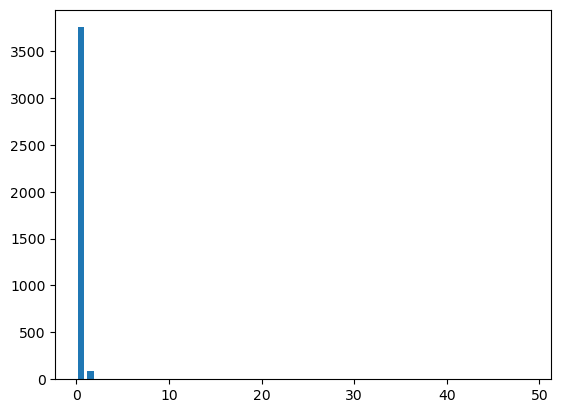

In [23]:
LGN_spike_time,fr=read_spike('/home/zhaobenyan/dataset/patchfast/sample_spikeCount_test_1.bin')
plt.hist(fr,bins=np.arange(0,50,1),rwidth=0.7)

In [14]:
#lgn=np.array(LGN_spike_time)
lgn=LGN_spike_time
print(lgn.shape)
print(len(lgn[0]))
ar,num=np.unique(lgn,return_counts=True)
# #print(LGN_spike_time[0])
print(ar[1:])
print([num[0],np.sum(num[1:])])

(512, 16000)
16000
[1 2 3 4]
[7910110, 281890]


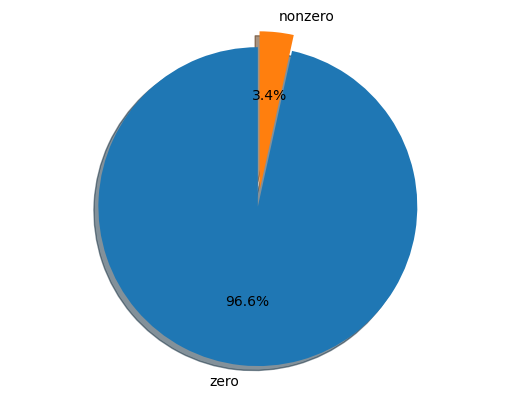

In [15]:
# Pie chart, where the slices will be ordered and plotted counter-clockwise:
#labels = '0', '1', '2', '3','4'
explode = (0, 0.1)  # only "explode" the 1st slice (i.e. '0')
numbers=[num[0],np.sum(num[1:])]
labels=['zero','nonzero']
fig1, ax1 = plt.subplots()
ax1.pie(numbers, labels=labels,explode=explode, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.savefig('lgn_spike.jpg')
plt.show()